In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
def filepath_to_csv(filepath):
    csv_df = pd.read_csv(filepath)
    column_names = csv_df.columns[0].split(";")
    title_col = csv_df.columns[0]
    
    data_lists = []
    for column in column_names:
        data_lists.append([])

    for i in range(len(csv_df)):
        data_row = csv_df.iloc[i][title_col].split(";")
        for j in range(len(data_row)):
            data_lists[j].append(data_row[j])

    csv_dict = {}
    for j in range(len(data_row)):
        csv_dict[column_names[j]] = data_lists[j]

    df = pd.DataFrame(csv_dict)

    df['day'] = df['day'].astype(int)
    df['timestamp'] = df['timestamp'].astype(int)
    df['product'] = df['product'].astype(str)

    for i in range(3):
        ask_price_str = "ask_price_" + str(i+1)
        ask_volume_str = "ask_volume_" + str(i+1)
        bid_price_str = "bid_price_" + str(i+1)
        bid_volume_str = "bid_volume_" + str(i+1)

        df[ask_price_str] = df[ask_price_str].replace("", np.nan).astype(float)
        df[ask_volume_str] = df[ask_volume_str].replace("", 0).astype(int)
        df[bid_price_str] = df[bid_price_str].replace("", np.nan).astype(float)
        df[bid_volume_str] = df[bid_volume_str].replace("", 0).astype(int)

    df["mid_price"] = df["mid_price"].replace("", np.nan).astype(float)
    df["profit_and_loss"] = df["profit_and_loss"].replace("", np.nan).astype(float)

    return df

filepaths = [
    "prices_round_1_day_-1.csv",
    "prices_round_1_day_-2.csv",
    "prices_round_1_day_0.csv",
]

filepath = filepaths[2]
df = filepath_to_csv(filepath)

In [66]:
df['weighted_price'] = ((df['bid_price_1']*df['bid_volume_1'])+(df['ask_price_1']*df['ask_volume_1'])) / (df['bid_volume_1'] + df['ask_volume_1'])


In [73]:
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,weighted_price
0,0,0,AMETHYSTS,9998.0,1,9995.0,30,NaN,0,10005.0,30,NaN,0,NaN,0,10001.5,0.0,10004.774194
1,0,0,STARFRUIT,5036.0,30,NaN,0,NaN,0,5043.0,30,NaN,0,NaN,0,5039.5,0.0,5039.500000
2,0,100,AMETHYSTS,9996.0,1,9995.0,30,NaN,0,10002.0,6,10004.0,1,10005.0,30,9999.0,0.0,10001.142857
3,0,100,STARFRUIT,5041.0,4,5037.0,1,5036.0,30,5043.0,31,NaN,0,NaN,0,5042.0,0.0,5042.771429
4,0,200,AMETHYSTS,9996.0,1,9995.0,21,NaN,0,10004.0,1,10005.0,21,NaN,0,10000.0,0.0,10000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,999700,STARFRUIT,5053.0,1,5048.0,26,NaN,0,5054.0,2,5055.0,24,NaN,0,5053.5,0.0,5053.666667
19996,0,999800,STARFRUIT,5047.0,27,NaN,0,NaN,0,5052.0,1,5054.0,27,NaN,0,5049.5,0.0,5047.178571
19997,0,999800,AMETHYSTS,9995.0,27,NaN,0,NaN,0,10005.0,27,NaN,0,NaN,0,10000.0,0.0,10000.000000
19998,0,999900,STARFRUIT,5048.0,2,5047.0,21,NaN,0,5054.0,23,NaN,0,NaN,0,5051.0,0.0,5053.520000


In [74]:
AMETHYSTS_df = df[df['product'].eq("AMETHYSTS")].copy()
STARFRUIT_df = df[df['product'].eq("STARFRUIT")].copy()

# STARFRUITS

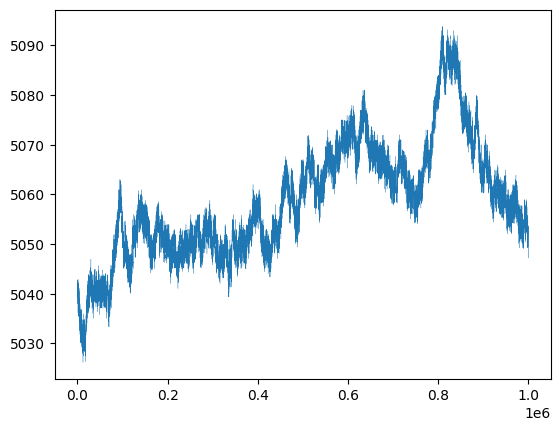

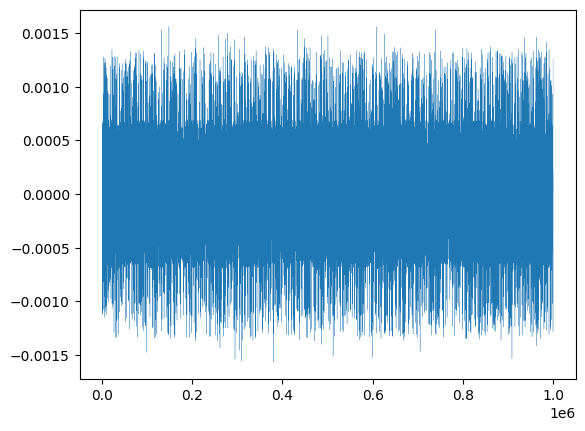

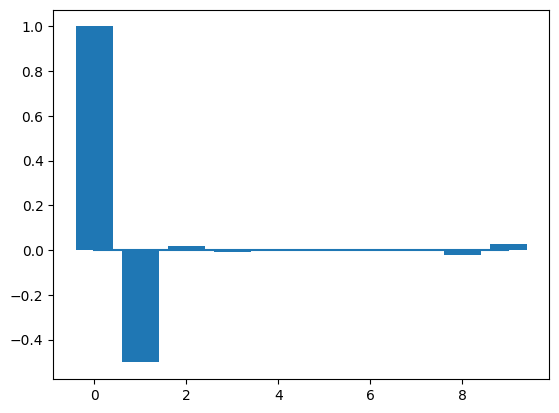

In [159]:

STARFRUIT_df['returns'] = STARFRUIT_df['weighted_price'] /STARFRUIT_df['weighted_price'].shift() - 1

plt.plot(
    STARFRUIT_df['timestamp'],
    STARFRUIT_df['weighted_price'],
    lw=0.2
)
plt.show()

plt.plot(
    STARFRUIT_df['timestamp'],
    STARFRUIT_df['returns'],
    lw=0.2
)
plt.show()

x = []
y = []

for i in range(10):
    x.append(i)
    y.append(STARFRUIT_df['returns'].autocorr(lag=i))

plt.bar(x, y)
plt.plot([x[0], x[-1]],
        [0,0])

plt.show()


x = []
y = []

for i in range(10):
    x.append(i)
    y.append(STARFRUIT_df['returns'].autocorr(lag=i))

plt.bar(x, y)
plt.plot([x[0], x[-1]],
        [0,0])

plt.show()



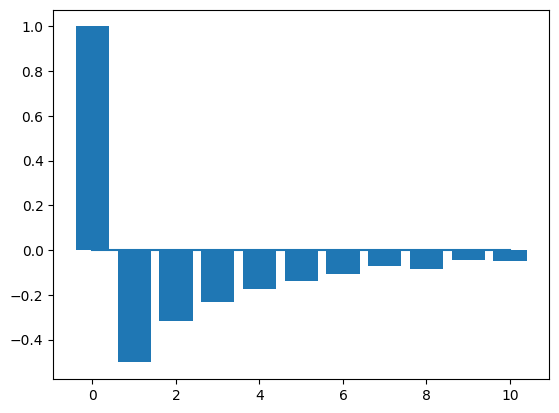

In [198]:
import pandas as pd
from statsmodels.tsa.stattools import pacf

# Calculate PACF
pacf_values = pacf(STARFRUIT_df['returns'].iloc[1:], nlags=10)

x = []
y = []
for i in range(len(pacf_values)):
    x.append(i)
    y.append(pacf_values[i])
    
plt.bar(x, y)
plt.plot([x[0], x[-1]],
        [0,0])

plt.show()


## Looks a lot like a MA(1) Process

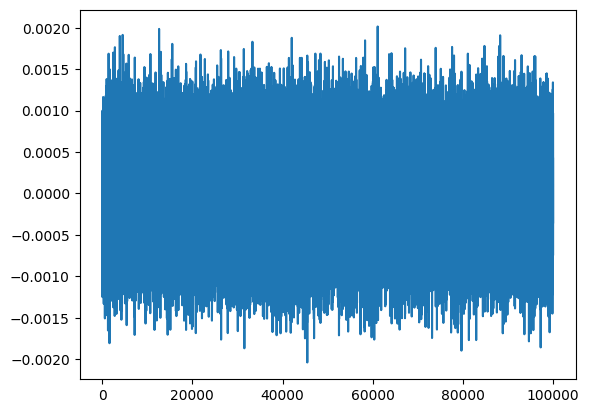

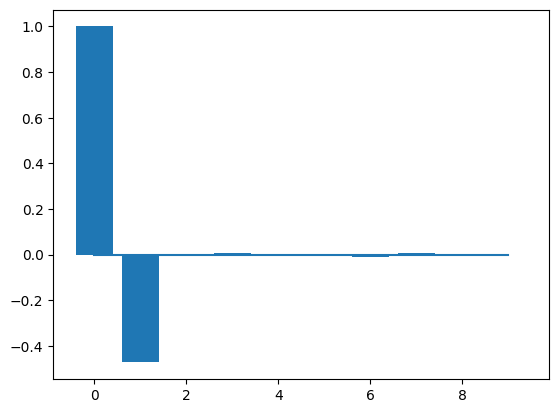

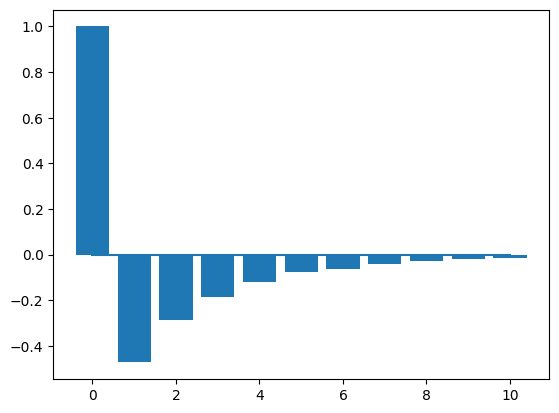

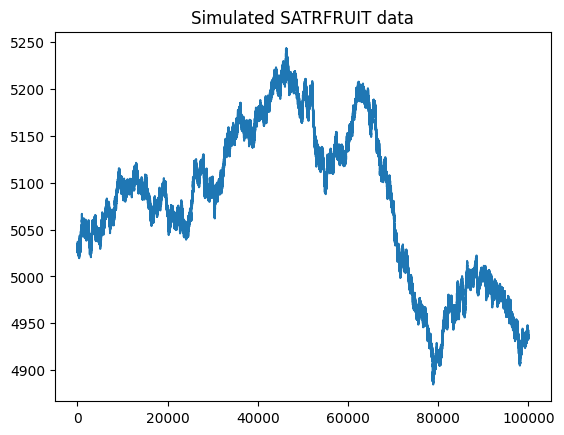

In [214]:
w_1 = 0.0
w_2 = 0.0
theta = -0.7

x_list = []
for i in range(100_000):
    w_1 = np.random.normal(scale=0.0004)
    x = w_1 + theta*w_2
    x_list.append(x)
    w_2 = w_1

plt.plot(x_list)
plt.show()

x_list = pd.Series(x_list)

## ACF
x = []
y = []
for i in range(10):
    x.append(i)
    y.append(x_list.autocorr(lag=i))
plt.bar(x, y)
plt.plot([x[0], x[-1]],
        [0,0])
plt.show()

## PACF

# Calculate PACF
pacf_values = pacf(x_list, nlags=10)

x = []
y = []
for i in range(len(pacf_values)):
    x.append(i)
    y.append(pacf_values[i])
    
plt.bar(x, y)
plt.plot([x[0], x[-1]],
        [0,0])
plt.show()

s_0 = 5030
s_list = []
for i in range(len(x_list)):
    ds = s_0*x_list[i]
    s_0 += ds
    s_list.append(s_0)

plt.plot(s_list)
plt.title("Simulated SATRFRUIT data")
plt.show()


In [215]:
print("Hello")

Hello


# AMETHYSTS

<BarContainer object of 5 artists>

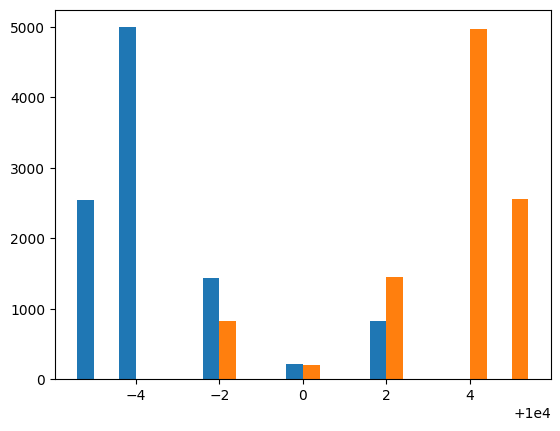

In [87]:
amethysts_bids = AMETHYSTS_df.bid_price_1.value_counts()
amethysts_asks = AMETHYSTS_df.ask_price_1.value_counts()

plt.bar(amethysts_bids.index-0.2, amethysts_bids.values, width=0.4)
plt.bar(amethysts_asks.index+0.2, amethysts_asks.values, width=0.4)


In [154]:
def trade(data_row, position, seashells, price_b, price_a):
    bid_price_1 = data_row['bid_price_1']
    bid_volume_1 = data_row['bid_volume_1']
    
    ask_price_1 = data_row['ask_price_1']
    ask_volume_1 = data_row['ask_volume_1']

    lower_bound = -20
    upper_bound = +20
    
    if bid_price_1 > price_b:
        if (position - bid_volume_1) > lower_bound:
            position -= bid_volume_1
            seashells += bid_volume_1*bid_price_1
        else:
            diff = (lower_bound + position)
            position -= diff
            seashells += diff*bid_price_1

    
    if ask_price_1 < price_a:
        if position < upper_bound:
            if (position + ask_volume_1) < upper_bound:            
                position += ask_volume_1
                seashells -= ask_volume_1*ask_price_1
            else:
                diff = (upper_bound - position)
                position += diff
                seashells -= (diff)*ask_price_1
            
            
    return position, seashells
    



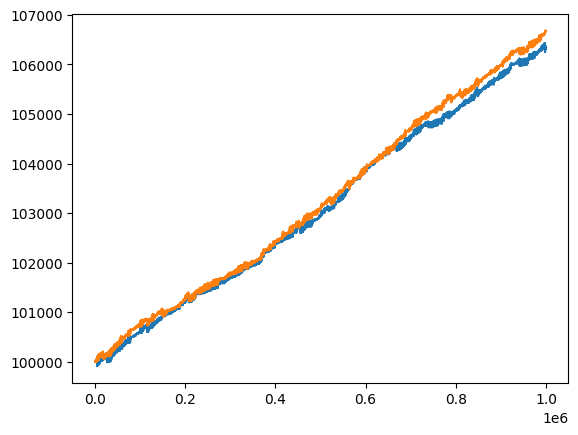

In [156]:
price_b = 10_000
price_a = 10_000


position = 0
seashells = 100_000

timestamp_list = []
position_list = []
seashells_list = []
total_value_list = []

for i in range(len(AMETHYSTS_df)):
    data_row = AMETHYSTS_df.iloc[i]
    timestamp = data_row.timestamp
    mid_price = data_row.mid_price

    position, seashells = trade(data_row, position, seashells, price_b, price_a)

    timestamp_list.append(timestamp)
    position_list.append(position)
    seashells_list.append(seashells)
    total_value_list.append(seashells + (mid_price*position))

plt.plot(timestamp_list, total_value_list)

################################

price_b = 9_999
price_a = 10_001

position = 0
seashells = 100_000

timestamp_list = []
position_list = []
seashells_list = []
total_value_list = []

for i in range(len(AMETHYSTS_df)):
    data_row = AMETHYSTS_df.iloc[i]
    timestamp = data_row.timestamp
    mid_price = data_row.mid_price

    position, seashells = trade(data_row, position, seashells, price_b, price_a)

    timestamp_list.append(timestamp)
    position_list.append(position)
    seashells_list.append(seashells)
    total_value_list.append(seashells + (mid_price*position))

plt.plot(timestamp_list, total_value_list)

################################
